In [1]:
from path import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import statsapi
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [85]:
# read the data 
data2019 = Path("Data/2019rotosheet.csv")
df2019 = pd.read_csv(data2019)
df2019.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info,is sea home,is oak home,is new york home,is cini hom,is mia home,is laa hom
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,Nick Hundley,2,NaN,Y,1.0,0.0,0.0,0.0,0.0,NaN
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Josh Phegley,2,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Luis Castillo,1,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Hyun-Jin Ryu,1,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Jose Urena,1,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
data2018 = Path("Data/2018rotosheet.csv")
df2018 = pd.read_csv(data2018)
df2018.tail()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
2426,20180930,0,Sun,CHA,AL,162,MIN,AL,162,4,...,Logan Forsythe,4,astuw001,Willians Astudillo,5,gratj001,Juan Graterol,2,NaN,Y
2427,20180930,0,Sun,TEX,AL,162,SEA,AL,162,1,...,Kristopher Negron,4,freid001,David Freitas,2,romia001,Andrew Romine,6,NaN,Y
2428,20180930,0,Sun,TOR,AL,162,TBA,AL,162,4,...,Austin Meadows,9,bauej001,Jake Bauers,3,ciufn001,Nick Ciuffo,2,NaN,Y
2429,20181001,0,Mon,MIL,NL,163,CHN,NL,163,3,...,Jason Heyward,8,quinj001,Jose Quintana,1,contw001,Willson Contreras,2,NaN,Y
2430,20181001,0,Mon,COL,NL,163,LAN,NL,163,2,...,Yasiel Puig,9,herne001,Enrique Hernandez,4,buehw001,Walker Buehler,1,NaN,Y


In [87]:
data2017 = Path("Data/2017rotosheet.csv")
df2017 = pd.read_csv(data2017)
df2017.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20170402,0,Sun,SFN,NL,1,ARI,NL,1,5,...,David Peralta,9,mathj001,Jeff Mathis,2,greiz001,Zack Greinke,1,NaN,Y
1,20170402,0,Sun,CHN,NL,1,SLN,NL,1,3,...,Jedd Gyorko,4,gricr001,Randal Grichuk,7,martc006,Carlos Martinez,1,NaN,Y
2,20170402,0,Sun,NYA,AL,1,TBA,AL,1,3,...,Tim Beckham,6,smitm007,Mallex Smith,7,norrd001,Derek Norris,2,NaN,Y
3,20170403,0,Mon,PHI,NL,1,CIN,NL,1,4,...,Zack Cozart,6,barnt001,Tucker Barnhart,2,felds001,Scott Feldman,1,NaN,Y
4,20170403,0,Mon,SDN,NL,1,LAN,NL,1,3,...,Yasmani Grandal,2,puigy001,Yasiel Puig,9,kersc001,Clayton Kershaw,1,NaN,Y


In [88]:
data2016 = Path("Data/2016rotosheet.csv")
df2016 = pd.read_csv(data2016)
df2016.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20160403,0,Sun,NYN,NL,1,KCA,AL,1,3,...,Salvador Perez,2,infao001,Omar Infante,4,fuenr001,Reymond Fuentes,9,NaN,Y
1,20160403,0,Sun,TOR,AL,1,TBA,AL,1,5,...,Steven Souza,9,kierk001,Kevin Kiermaier,8,congh001,Hank Conger,2,NaN,Y
2,20160403,0,Sun,SLN,NL,1,PIT,NL,1,1,...,Josh Harrison,4,mercj002,Jordy Mercer,6,lirif001,Francisco Liriano,1,NaN,Y
3,20160404,0,Mon,CHN,NL,1,ANA,AL,1,9,...,Andrelton Simmons,6,perec003,Carlos Perez,2,giavj001,Johnny Giavotella,4,NaN,Y
4,20160404,0,Mon,MIN,AL,1,BAL,AL,1,2,...,J.J. Hardy,6,schoj001,Jonathan Schoop,4,rickj001,Joey Rickard,7,NaN,Y


In [89]:
data2015 = Path("Data/2015rotosheet.csv")
df2015 = pd.read_csv(data2015)
df2015.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20150405,0,Sun,SLN,NL,1,CHN,NL,1,3,...,David Ross,2,lestj001,Jon Lester,1,lastt001,Tommy La Stella,4,NaN,Y
1,20150406,0,Mon,MIN,AL,1,DET,AL,1,0,...,Nick Castellanos,5,avila001,Alex Avila,2,iglej001,Jose Iglesias,6,NaN,Y
2,20150406,0,Mon,CLE,AL,1,HOU,AL,1,0,...,Jed Lowrie,6,rasmc001,Colby Rasmus,7,marij002,Jake Marisnick,8,NaN,Y
3,20150406,0,Mon,CHA,AL,1,KCA,AL,1,1,...,Alex Rios,9,peres002,Salvador Perez,2,infao001,Omar Infante,4,NaN,Y
4,20150406,0,Mon,TOR,AL,1,NYA,AL,1,6,...,Alex Rodriguez,10,drews001,Stephen Drew,4,gregd001,Didi Gregorius,6,NaN,Y


In [90]:
data2014 = Path("Data/2014rotosheet.csv")
df2014 = pd.read_csv(data2014)
df2014.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20140322,0,Sat,LAN,NL,1,ARI,NL,1,3,...,Chris Owings,6,parrg001,Gerardo Parra,9,milew001,Wade Miley,1,NaN,Y
1,20140323,0,Sun,LAN,NL,2,ARI,NL,2,7,...,Gerardo Parra,9,gregd001,Didi Gregorius,6,cahit001,Trevor Cahill,1,NaN,Y
2,20140330,0,Sun,LAN,NL,3,SDN,NL,1,1,...,Will Venable,8,river003,Rene Rivera,2,casha001,Andrew Cashner,1,NaN,Y
3,20140331,0,Mon,SEA,AL,1,ANA,AL,1,10,...,Howie Kendrick,4,iannc001,Chris Iannetta,2,aybae001,Erick Aybar,6,NaN,Y
4,20140331,0,Mon,BOS,AL,1,BAL,AL,1,1,...,Delmon Young,10,flahr001,Ryan Flaherty,5,schoj001,Jonathan Schoop,4,NaN,Y


In [91]:
data2013_2010 = Path("Data/2013-2010rotosheet.csv")
df2013_2010 = pd.read_csv(data2013_2010)
df2013_2010.head()

C:\Users\joshu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20130331,0,Sun,TEX,AL,1,HOU,AL,1,2,...,Matt Dominguez,5,barnb002,Brandon Barnes,9,ceder002,Ronny Cedeno,6,NaN,Y
1,20130401,0,Mon,KCA,AL,1,CHA,AL,1,0,...,Alexei Ramirez,6,flowt001,Tyler Flowers,2,beckg001,Gordon Beckham,4,NaN,Y
2,20130401,0,Mon,DET,AL,1,MIN,AL,1,4,...,Chris Parmelee,9,dozib001,Brian Dozier,4,florp001,Pedro Florimon,6,NaN,Y
3,20130401,0,Mon,BOS,AL,1,NYA,AL,1,8,...,Ichiro Suzuki,9,nix-j001,Jayson Nix,5,cervf001,Francisco Cervelli,2,NaN,Y
4,20130401,0,Mon,SEA,AL,1,OAK,AL,1,2,...,Josh Donaldson,5,smits002,Seth Smith,10,sogae001,Eric Sogard,4,NaN,Y


In [92]:
df_allyears = pd.concat([df2019,df2018,df2017,df2016,df2015,df2014,df2013_2010], axis="rows", join="inner")

In [93]:
df_allyears.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y


In [94]:
df_allyears.reset_index(inplace=True)

In [95]:
df_allyears.head()

,index,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,...,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y
1,1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
2,2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
3,3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
4,4,20190328,0,Thu,COL,NL,1,MIA,NL,1,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y


In [96]:
df_allyears.drop(columns = 'index', inplace=True)

In [97]:
df_allyears.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 7 Name,HOM 7 Def Pos,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,Jurickson Profar,4,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,Tucker Barnhart,2,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,Enrique Hernandez,4,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,Miguel Rojas,6,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y


In [98]:
df_allyears['home_winner'] = 0


In [99]:
df_allyears['spread'] =0.00

In [100]:
df_allyears.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info,home_winner,spread
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y,0,0.0
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y,0,0.0
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y,0,0.0
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y,0,0.0
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y,0,0.0


In [101]:
for x in range(0,len(df_allyears)):
    df_allyears['spread'][x] = df_allyears['hom score'][x] - df_allyears['vis score'][x]
    if (df_allyears['hom score'][x] - df_allyears['vis score'][x]) > 0:
        df_allyears['home_winner'][x] = 1
    else:
        df_allyears['home_winner'][x] = 0

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [102]:
df_allyears.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,HOM 8 ID,HOM 8 Name,HOM 8 Def Pos,HOM 9 ID,HOM 9 Name,HOM 9 Def Pos,Additional Info,acq info,home_winner,spread
0,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,...,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y,0,-2.0
1,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,...,laurr001,Ramon Laureano,8,phegj001,Josh Phegley,2,NaN,Y,0,-1.0
2,20190328,0,Thu,PIT,NL,1,CIN,NL,1,3,...,iglej001,Jose Iglesias,6,castl003,Luis Castillo,1,NaN,Y,1,2.0
3,20190328,0,Thu,ARI,NL,1,LAN,NL,1,5,...,barna001,Austin Barnes,2,ryu-h001,Hyun-Jin Ryu,1,NaN,Y,1,7.0
4,20190328,0,Thu,COL,NL,1,MIA,NL,1,6,...,herrr002,Rosell Herrera,7,urenj001,Jose Urena,1,NaN,Y,0,-3.0


In [103]:
df_allyears['Date'] = df_allyears['Date'].apply(lambda d:pd.to_datetime(d,format='%Y%m%d'))

In [104]:
df_allyears['vis team'].unique()

array(['SEA', 'PIT', 'ARI', 'COL', 'SLN', 'ATL', 'SFN', 'NYN', 'CHA',
       'CLE', 'BAL', 'ANA', 'BOS', 'HOU', 'CHN', 'DET', 'MIL', 'PHI',
       'MIN', 'WAS', 'CIN', 'TEX', 'NYA', 'TOR', 'KCA', 'MIA', 'LAN',
       'TBA', 'SDN', 'OAK', 'FLO'], dtype=object)

In [105]:
df_allyears['vis team'].replace(to_replace = 'SLN', value='STL', inplace=True)
df_allyears['vis team'].replace(to_replace = 'SFN', value='SFG', inplace=True)
df_allyears['vis team'].replace(to_replace = 'NYN', value='NYM', inplace=True)
df_allyears['vis team'].replace(to_replace = 'CHA', value='CHW', inplace=True)
df_allyears['vis team'].replace(to_replace = 'CHN', value='CHC', inplace=True)
df_allyears['vis team'].replace(to_replace = 'KCA', value='KCR', inplace=True)
df_allyears['vis team'].replace(to_replace = 'WAS', value='WSN', inplace=True)
df_allyears['vis team'].replace(to_replace = 'NYA', value='NYY', inplace=True)
df_allyears['vis team'].replace(to_replace = 'FLL', value='FLA', inplace=True)
df_allyears['vis team'].replace(to_replace = 'LAN', value='LAD', inplace=True)
df_allyears['vis team'].replace(to_replace = 'TBA', value='TBD', inplace=True)
df_allyears['vis team'].replace(to_replace = 'SDN', value='SDP', inplace=True)
df_allyears['vis team'].replace(to_replace = 'FLO', value='FLA', inplace=True)
df_allyears['vis team'].replace(to_replace = 'MIA', value='FLA', inplace=True)

In [106]:
df_allyears['hom team'].replace(to_replace = 'SLN', value='STL', inplace=True)
df_allyears['hom team'].replace(to_replace = 'SFN', value='SFG', inplace=True)
df_allyears['hom team'].replace(to_replace = 'NYN', value='NYM', inplace=True)
df_allyears['hom team'].replace(to_replace = 'CHA', value='CHW', inplace=True)
df_allyears['hom team'].replace(to_replace = 'CHN', value='CHC', inplace=True)
df_allyears['hom team'].replace(to_replace = 'KCA', value='KCR', inplace=True)
df_allyears['hom team'].replace(to_replace = 'WAS', value='WSN', inplace=True)
df_allyears['hom team'].replace(to_replace = 'NYA', value='NYY', inplace=True)
df_allyears['hom team'].replace(to_replace = 'FLL', value='FLA', inplace=True)
df_allyears['hom team'].replace(to_replace = 'LAN', value='LAD', inplace=True)
df_allyears['hom team'].replace(to_replace = 'TBA', value='TBD', inplace=True)
df_allyears['hom team'].replace(to_replace = 'SDN', value='SDP', inplace=True)
df_allyears['hom team'].replace(to_replace = 'FLO', value='FLA', inplace=True)
df_allyears['hom team'].replace(to_replace = 'MIA', value='FLA', inplace=True)

In [107]:
df_allyears['vis team'].unique()

array(['SEA', 'PIT', 'ARI', 'COL', 'STL', 'ATL', 'SFG', 'NYM', 'CHW',
       'CLE', 'BAL', 'ANA', 'BOS', 'HOU', 'CHC', 'DET', 'MIL', 'PHI',
       'MIN', 'WSN', 'CIN', 'TEX', 'NYY', 'TOR', 'KCR', 'FLA', 'LAD',
       'TBD', 'SDP', 'OAK'], dtype=object)

In [108]:
df_allyears.to_csv(r'dataframev3.csv')

In [109]:
elodata = Path("Data/elo2010-2019.csv")
df_elo_data = pd.read_csv(elodata)
df_elo_data.head()

,Date,season,neutral,playoff,hom team,vis team,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,10/30/2019,2019,0,w,HOU,WSN,1599.542804,1584.363378,0.574617,0.425383,...,56.920649,61.723620,0.989236,27.776342,0.515172,0.484828,1587.973463,1583.382133,2,6
1,10/29/2019,2019,0,w,HOU,WSN,1605.069000,1578.837182,0.595209,0.404791,...,62.975093,60.272516,28.723451,21.776276,0.594638,0.405362,1591.026009,1580.329587,2,7
2,10/27/2019,2019,0,w,WSN,HOU,1584.005206,1599.900976,0.515546,0.484454,...,49.433197,66.891460,-29.811205,47.888341,0.373102,0.626898,1576.189971,1595.165625,1,7
3,10/26/2019,2019,0,w,WSN,HOU,1589.985555,1593.920627,0.538425,0.461575,...,56.003581,51.251046,0.823752,-24.893480,0.586974,0.413026,1578.722119,1592.633477,1,8
4,10/25/2019,2019,0,w,WSN,HOU,1593.827376,1590.078806,0.553044,0.446956,...,54.036365,57.096801,-9.053908,2.440389,0.526852,0.473148,1583.715416,1587.640180,1,4


In [110]:
team_name_list=df_elo_data['vis team'].unique()

In [111]:
df_elo_data['Date'] = df_elo_data['Date'].apply(lambda d:pd.to_datetime(d,format='%m/%d/%Y'))

In [112]:
df_allyears_elo = df_allyears.merge(df_elo_data, how = 'inner', left_on = ['Date', 'hom team', 'vis team'], right_on = ['Date', 'hom team', 'vis team'])

In [113]:
df_allyears_elo.to_csv(r'test.csv')

In [114]:
df_allyears_elo['vis team'].unique()

array(['SEA', 'PIT', 'ARI', 'COL', 'STL', 'ATL', 'SFG', 'NYM', 'CHW',
       'CLE', 'BAL', 'ANA', 'BOS', 'HOU', 'CHC', 'DET', 'MIL', 'PHI',
       'MIN', 'WSN', 'CIN', 'TEX', 'NYY', 'TOR', 'KCR', 'FLA', 'LAD',
       'TBD', 'SDP', 'OAK'], dtype=object)

In [115]:
df_allyears_elo['hom avg HRs'] = 0.00000000
df_allyears_elo['vis avg HRs'] = 0.00000000
df_allyears_elo['hom rolling HRs'] = 0.00000000
df_allyears_elo['vis rolling HRs'] = 0.00000000

In [116]:
df_allyears_elo.sort_values(by = ['Date'] ,ascending = True, inplace=True)

In [117]:
df_allyears_elo.reset_index(inplace=True)
df_allyears_elo.drop(columns = 'index', inplace = True)
df_allyears_elo.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,hom avg HRs,vis avg HRs,hom rolling HRs,vis rolling HRs
0,2010-04-04,0,Sun,NYY,AL,1,BOS,AL,1,7,...,0.471714,0.528286,1538.434,1560.840,9,7,0.0,0.0,0.0,0.0
1,2010-04-05,0,Mon,PHI,NL,1,WSN,NL,1,11,...,0.366599,0.633401,1457.637,1540.900,1,11,0.0,0.0,0.0,0.0
2,2010-04-05,0,Mon,LAD,NL,1,PIT,NL,1,5,...,0.412210,0.587790,1458.963,1523.359,11,5,0.0,0.0,0.0,0.0
3,2010-04-05,0,Mon,COL,NL,1,MIL,NL,1,5,...,0.505293,0.494707,1494.669,1519.280,3,5,0.0,0.0,0.0,0.0
4,2010-04-05,0,Mon,SFG,NL,1,HOU,NL,1,5,...,0.451397,0.548603,1473.590,1510.954,2,5,0.0,0.0,0.0,0.0


In [118]:
df_vis_avg_hr = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS HR'].expanding().mean())
df_vis_avg_hr.reset_index(inplace=True)
df_vis_avg_hr.set_index('level_1', inplace=True)
df_vis_avg_hr.sort_index(inplace=True)

In [119]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis avg HRs'][x] = df_vis_avg_hr['VIS HR'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
df_hom_avg_hr = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM HR'].expanding().mean())
df_hom_avg_hr.reset_index(inplace=True)
df_hom_avg_hr.set_index('level_1', inplace=True)
df_hom_avg_hr.sort_index(inplace=True)


In [121]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['hom avg HRs'][x] = df_hom_avg_hr['HOM HR'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
df_hom_rolling_hr = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM HR'].rolling(window = 30).mean())
df_hom_rolling_hr.reset_index(inplace=True)
df_hom_rolling_hr.set_index('level_1', inplace=True)
df_hom_rolling_hr.sort_index(inplace=True)

In [123]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['hom rolling HRs'][x] = df_hom_rolling_hr['HOM HR'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
df_vis_rolling_hr = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS HR'].rolling(window = 30).mean())
df_vis_rolling_hr.reset_index(inplace=True)
df_vis_rolling_hr.set_index('level_1', inplace=True)
df_vis_rolling_hr.sort_index(inplace=True)

In [125]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis rolling HRs'][x] = df_vis_rolling_hr['VIS HR'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
df_allyears_elo.fillna(0, inplace=True)
df_allyears_elo.tail()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,hom avg HRs,vis avg HRs,hom rolling HRs,vis rolling HRs
24817,2019-09-29,0,Sun,SDP,NL,162,ARI,NL,162,0,...,0.607221,0.392779,1517.498163,1460.337292,1,0,1.092138,0.978155,1.366667,1.166667
24818,2019-09-29,0,Sun,NYY,AL,162,TEX,AL,162,1,...,0.451626,0.548374,1471.926549,1579.918534,6,1,1.237454,1.207637,1.166667,2.166667
24819,2019-09-29,0,Sun,TBD,AL,162,TOR,AL,162,3,...,0.409279,0.590721,1473.998429,1543.519575,8,3,1.399015,1.156138,1.900000,1.466667
24820,2019-09-29,0,Sun,LAD,NL,162,SFG,NL,162,9,...,0.363906,0.636094,1473.671069,1596.004820,0,9,0.647783,1.050542,0.866667,1.900000
24821,2019-09-29,0,Sun,OAK,AL,162,SEA,AL,162,1,...,0.418133,0.581867,1465.818655,1559.092801,3,1,0.988889,1.195360,1.000000,1.733333


In [127]:
df_allyears_elo['hom avg RBIs'] = 0.00000000
df_allyears_elo['vis avg RBIs'] = 0.00000000
df_allyears_elo['hom rolling RBIs'] = 0.00000000
df_allyears_elo['vis rolling RBIs'] = 0.00000000

In [128]:
df_vis_avg_rbi = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS RBI'].expanding().mean())
df_vis_avg_rbi.reset_index(inplace=True)
df_vis_avg_rbi.set_index('level_1', inplace=True)
df_vis_avg_rbi.sort_index(inplace=True)

df_hom_avg_rbi = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM RBI'].expanding().mean())
df_hom_avg_rbi.reset_index(inplace=True)
df_hom_avg_rbi.set_index('level_1', inplace=True)
df_hom_avg_rbi.sort_index(inplace=True)

In [129]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis avg RBIs'][x] = df_vis_avg_rbi['VIS RBI'][x]
        df_allyears_elo['hom avg RBIs'][x] = df_hom_avg_rbi['HOM RBI'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
df_vis_rolling_rbi = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS RBI'].rolling(window=30).mean())
df_vis_rolling_rbi.reset_index(inplace=True)
df_vis_rolling_rbi.set_index('level_1', inplace=True)
df_vis_rolling_rbi.sort_index(inplace=True)

df_hom_rolling_rbi = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM RBI'].rolling(window=30).mean())
df_hom_rolling_rbi.reset_index(inplace=True)
df_hom_rolling_rbi.set_index('level_1', inplace=True)
df_hom_rolling_rbi.sort_index(inplace=True)

In [131]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis rolling RBIs'][x] = df_vis_rolling_rbi['VIS RBI'][x]
        df_allyears_elo['hom rolling RBIs'][x] = df_hom_rolling_rbi['HOM RBI'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
df_vis_avg_h = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS H'].expanding().mean())
df_vis_avg_h.reset_index(inplace=True)
df_vis_avg_h.set_index('level_1', inplace=True)
df_vis_avg_h.sort_index(inplace=True)

df_hom_avg_h = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM H'].expanding().mean())
df_hom_avg_h.reset_index(inplace=True)
df_hom_avg_h.set_index('level_1', inplace=True)
df_hom_avg_h.sort_index(inplace=True)

df_vis_rolling_h = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS H'].rolling(window=30).mean())
df_vis_rolling_h.reset_index(inplace=True)
df_vis_rolling_h.set_index('level_1', inplace=True)
df_vis_rolling_h.sort_index(inplace=True)

df_hom_rolling_h = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM H'].rolling(window=30).mean())
df_hom_rolling_h.reset_index(inplace=True)
df_hom_rolling_h.set_index('level_1', inplace=True)
df_hom_rolling_h.sort_index(inplace=True)


In [133]:
df_allyears_elo['hom avg Hs'] = 0.00000000
df_allyears_elo['vis avg Hs'] = 0.00000000
df_allyears_elo['hom rolling Hs'] = 0.00000000
df_allyears_elo['vis rolling Hs'] = 0.00000000



In [135]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis avg Hs'][x] = df_vis_avg_h['VIS H'][x]
        df_allyears_elo['hom avg Hs'][x] = df_hom_avg_h['HOM H'][x]
        df_allyears_elo['vis rolling Hs'][x] = df_vis_rolling_h['VIS H'][x]
        df_allyears_elo['hom rolling Hs'][x] = df_hom_rolling_h['HOM H'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [136]:
df_vis_avg_k = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS K'].expanding().mean())
df_vis_avg_k.reset_index(inplace=True)
df_vis_avg_k.set_index('level_1', inplace=True)
df_vis_avg_k.sort_index(inplace=True)

df_hom_avg_k = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM K'].expanding().mean())
df_hom_avg_k.reset_index(inplace=True)
df_hom_avg_k.set_index('level_1', inplace=True)
df_hom_avg_k.sort_index(inplace=True)

df_vis_rolling_k = pd.DataFrame(df_allyears_elo.groupby('vis team')['VIS K'].rolling(window=30).mean())
df_vis_rolling_k.reset_index(inplace=True)
df_vis_rolling_k.set_index('level_1', inplace=True)
df_vis_rolling_k.sort_index(inplace=True)

df_hom_rolling_k = pd.DataFrame(df_allyears_elo.groupby('hom team')['HOM K'].rolling(window=30).mean())
df_hom_rolling_k.reset_index(inplace=True)
df_hom_rolling_k.set_index('level_1', inplace=True)
df_hom_rolling_k.sort_index(inplace=True)

In [137]:
df_allyears_elo['hom avg Ks'] = 0.00000000
df_allyears_elo['vis avg Ks'] = 0.00000000
df_allyears_elo['hom rolling Ks'] = 0.00000000
df_allyears_elo['vis rolling Ks'] = 0.00000000

In [138]:
for x in range(0,len(df_allyears_elo)):
        df_allyears_elo['vis avg Ks'][x] = df_vis_avg_k['VIS K'][x]
        df_allyears_elo['hom avg Ks'][x] = df_hom_avg_k['HOM K'][x]
        df_allyears_elo['vis rolling Ks'][x] = df_vis_rolling_k['VIS K'][x]
        df_allyears_elo['hom rolling Ks'][x] = df_hom_rolling_k['HOM K'][x]

C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\joshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

In [139]:
df_allyears_elo.fillna(0, inplace=True)
df_allyears_elo.head()

,Date,no of games,day,vis team,vis league,vis game no,hom team,hom league,hom game no,vis score,...,hom rolling RBIs,vis rolling RBIs,hom avg Hs,vis avg Hs,hom rolling Hs,vis rolling Hs,hom avg Ks,vis avg Ks,hom rolling Ks,vis rolling Ks
0,2010-04-04,0,Sun,NYY,AL,1,BOS,AL,1,7,...,0.0,0.0,12.0,12.0,0.0,0.0,5.0,2.0,0.0,0.0
1,2010-04-05,0,Mon,PHI,NL,1,WSN,NL,1,11,...,0.0,0.0,9.0,13.0,0.0,0.0,11.0,4.0,0.0,0.0
2,2010-04-05,0,Mon,LAD,NL,1,PIT,NL,1,5,...,0.0,0.0,10.0,12.0,0.0,0.0,3.0,5.0,0.0,0.0
3,2010-04-05,0,Mon,COL,NL,1,MIL,NL,1,5,...,0.0,0.0,12.0,10.0,0.0,0.0,7.0,5.0,0.0,0.0
4,2010-04-05,0,Mon,SFG,NL,1,HOU,NL,1,5,...,0.0,0.0,9.0,10.0,0.0,0.0,9.0,6.0,0.0,0.0


In [82]:
#list(df_allyears_encoded.columns)

In [83]:
#df_allyears_encoded_drop = df_allyears_encoded.drop(columns=[input column names])

In [142]:
df_allyears_elo.to_csv(r'dataframe.csv')

In [143]:
cleandata = Path("dataframev4.csv")
df_clean_data = pd.read_csv(cleandata)
df_clean_data.head()


,Date,vis team,vis league,hom team,hom league,home_winner,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,hom rolling RBIs,vis rolling RBIs,hom avg Hs,vis avg Hs,hom rolling Hs,vis rolling Hs,hom avg Ks,vis avg Ks,hom rolling Ks,vis rolling Ks
0,4/4/2010,NYY,AL,BOS,AL,1,1537.262,1568.875,0.489046,0.510954,...,0.0,0.0,12.0,12.0,0.0,0.0,5.0,2.0,0.0,0.0
1,4/5/2010,PHI,NL,WSN,NL,0,1460.859,1541.211,0.419607,0.580393,...,0.0,0.0,9.0,13.0,0.0,0.0,11.0,4.0,0.0,0.0
2,4/5/2010,LAD,NL,PIT,NL,1,1454.399,1525.860,0.432120,0.567880,...,0.0,0.0,10.0,12.0,0.0,0.0,3.0,5.0,0.0,0.0
3,4/5/2010,COL,NL,MIL,NL,0,1495.496,1516.869,0.503780,0.496220,...,0.0,0.0,12.0,10.0,0.0,0.0,7.0,5.0,0.0,0.0
4,4/5/2010,SFG,NL,HOU,NL,0,1474.605,1509.946,0.483685,0.516315,...,0.0,0.0,9.0,10.0,0.0,0.0,9.0,6.0,0.0,0.0


In [145]:
df_clean_data_encoded = pd.get_dummies(df_clean_data, columns = ['vis team', 'hom team','hom league','vis league'])


In [147]:
X = df_clean_data_encoded.copy()
X.drop(["home_winner", 'Date'], axis=1, inplace=True)
X.head()

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,...,hom team_SFG,hom team_STL,hom team_TBD,hom team_TEX,hom team_TOR,hom team_WSN,hom league_AL,hom league_NL,vis league_AL,vis league_NL
0,1537.262,1568.875,0.489046,0.510954,1536.601,1562.673,57.031,61.828,27.3493,46.703900,...,0,0,0,0,0,0,1,0,1,0
1,1460.859,1541.211,0.419607,0.580393,1460.662,1537.875,49.834,62.166,8.3942,49.495700,...,0,0,0,0,0,1,0,1,0,1
2,1454.399,1525.860,0.432120,0.567880,1455.051,1527.271,46.958,50.819,-6.9043,6.522398,...,0,0,0,0,0,0,0,1,0,1
3,1495.496,1516.869,0.503780,0.496220,1496.540,1517.409,53.119,59.030,28.8721,29.196400,...,0,0,0,0,0,0,0,1,0,1
4,1474.605,1509.946,0.483685,0.516315,1475.552,1508.992,54.192,62.849,26.3623,50.698900,...,0,0,0,0,0,0,0,1,0,1


In [148]:
y = df_clean_data_encoded["home_winner"].ravel()

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
scaler = StandardScaler()

In [151]:
X_scaler = scaler.fit(X_train)

In [152]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [153]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [154]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [155]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [156]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [157]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [158]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1321,1621
Actual 1,1107,2157


Accuracy Score : 0.5604253947792459
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.45      0.49      2942
           1       0.57      0.66      0.61      3264

    accuracy                           0.56      6206
   macro avg       0.56      0.55      0.55      6206
weighted avg       0.56      0.56      0.56      6206



In [159]:
importances = rf_model.feature_importances_

sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.0362871845460858, 'rating_prob2'),
 (0.036170724094619286, 'rating_prob1'),
 (0.035448263257643976, 'pitcher2_rgs'),
 (0.035419650292565, 'vis rolling RBIs'),
 (0.03532862987674688, 'pitcher1_rgs'),
 (0.03483724845228529, 'pitcher2_adj'),
 (0.034512139538214845, 'vis avg RBIs'),
 (0.03421688604058364, 'pitcher1_adj'),
 (0.0340898497684766, 'elo_prob1'),
 (0.03340446621805507, 'elo_prob2'),
 (0.03330622761381446, 'hom avg Hs'),
 (0.03313669116671436, 'hom avg HRs'),
 (0.033121100313077224, 'vis avg Ks'),
 (0.03299731825232407, 'vis rolling Hs'),
 (0.03276618505125257, 'rating1_pre'),
 (0.03268320022031905, 'vis avg Hs'),
 (0.03263468928355075, 'hom avg Ks'),
 (0.032567545090346234, 'vis avg HRs'),
 (0.03249748086348776, 'elo1_pre'),
 (0.03247837304567531, 'elo2_pre'),
 (0.032420928170019465, 'rating2_pre'),
 (0.03239200014950318, 'hom avg RBIs'),
 (0.03208547400122065, 'hom rolling RBIs'),
 (0.03034666834075011, 'hom rolling Ks'),
 (0.03010864025957528, 'vis rolling Ks'),
 (0.030091

In [160]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, ratio=1.0).fit_resample( X_train, y_train)
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

Counter(y_resampled)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
print(classification_report_imbalanced(y_test, y_pred))

Using TensorFlow backend.
C:\Users\joshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


                   pre       rec       spe        f1       geo       iba       sup

          0       0.54      0.55      0.58      0.55      0.57      0.32      2942
          1       0.59      0.58      0.55      0.59      0.57      0.32      3264

avg / total       0.57      0.57      0.57      0.57      0.57      0.32      6206



C:\Users\joshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [161]:
from sklearn.ensemble import GradientBoostingClassifier
import pydotplus
from IPython.display import Image

In [162]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.580
Accuracy score (validation): 0.560

Learning rate:  0.1
Accuracy score (training): 0.592
Accuracy score (validation): 0.568

Learning rate:  0.25
Accuracy score (training): 0.599
Accuracy score (validation): 0.571

Learning rate:  0.5
Accuracy score (training): 0.601
Accuracy score (validation): 0.570

Learning rate:  0.75
Accuracy score (training): 0.611
Accuracy score (validation): 0.562

Learning rate:  1
Accuracy score (training): 0.608
Accuracy score (validation): 0.561



In [163]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.25,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,0,1
1,0,0
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,1
9,1,1


In [164]:
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.5705768611021592


In [165]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,1136,1806
Actual 1,859,2405


In [166]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.39      0.46      2942
           1       0.57      0.74      0.64      3264

    accuracy                           0.57      6206
   macro avg       0.57      0.56      0.55      6206
weighted avg       0.57      0.57      0.56      6206



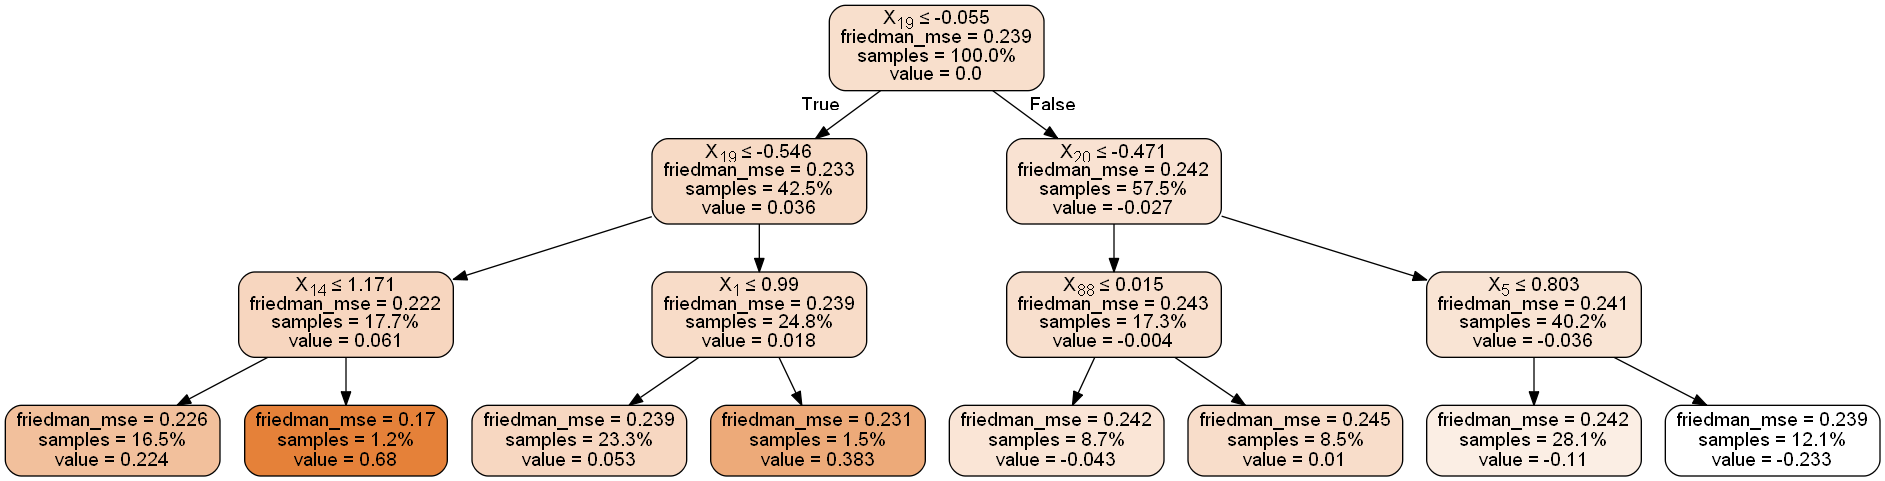

In [167]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [168]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
Counter(y_resampled)
model = LogisticRegression(random_state=1)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)


confusion_matrix(y_test, y_pred)

C:\Users\joshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1983,  959],
       [1746, 1518]], dtype=int64)

In [169]:
balanced_accuracy_score(y_test, y_pred)

0.5695524003279082

In [170]:
from xgboost import XGBClassifier

In [171]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [172]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [173]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.22%


In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras import losses
import seaborn
from scipy.stats import poisson,skellam

In [176]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=92))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

Train on 18616 samples
Epoch 1/100
18616/18616 [==============================] - 1s 50us/sample - loss: 0.7042 - accuracy: 0.5556
Epoch 2/100
18616/18616 [==============================] - 0s 26us/sample - loss: 0.6720 - accuracy: 0.5846
Epoch 3/100
18616/18616 [==============================] - 0s 26us/sample - loss: 0.6642 - accuracy: 0.5955
Epoch 4/100
18616/18616 [==============================] - 0s 26us/sample - loss: 0.6606 - accuracy: 0.6023
Epoch 5/100
18616/18616 [==============================] - 1s 28us/sample - loss: 0.6567 - accuracy: 0.6054
Epoch 6/100
18616/18616 [==============================] - 1s 27us/sample - loss: 0.6543 - accuracy: 0.6105
Epoch 7/100
18616/18616 [==============================] - 0s 26us/sample - loss: 0.6520 - accuracy: 0.6157
Epoch 8/100
18616/18616 [==============================] - 1s 29us/sample - loss: 0.6503 - accuracy: 0.6173s - loss: 0.6490 -  - ETA: 0s - loss: 0.6502 - accuracy: 0.
Epoch 9/100
18616/18616 [=============================

In [177]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

6206/1 - 0s - loss: 0.6508 - accuracy: 0.5707
Normal Neural Network - Loss: 0.7296161477004103, Accuracy: 0.5707380175590515


In [178]:
predicted = model.predict(X_test_scaled)


In [179]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predicted.ravel()
})


In [180]:
results.head(10)

,Actual,Predicted
0,1,0.245358
1,0,0.556245
2,1,0.646089
3,1,0.843922
4,1,0.345170
5,1,0.895374
6,1,0.523086
7,1,0.334009
8,1,0.480327
9,1,0.637768


In [181]:
# Create a DataFrame with the history dictionary
df_epoch = pd.DataFrame(
    model.history, index=range(1, len(model.history["loss"]) + 1)
)
# Plot the loss
df_moon.plot(y="loss")

TypeError: 'History' object is not subscriptable

In [122]:
number_hidden_nodes = 8
number_input_features = 92

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [123]:
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Train on 17373 samples, validate on 7446 samples
Epoch 1/200
17373/17373 [==============================] - 1s 33us/sample - loss: 2319.1019 - mse: 2319.1006 - val_loss: 27.3059 - val_mse: 27.3059
Epoch 2/200
17373/17373 [==============================] - 1s 31us/sample - loss: 14.3918 - mse: 14.3918 - val_loss: 23.7814 - val_mse: 23.7814
Epoch 3/200
17373/17373 [==============================] - 1s 29us/sample - loss: 12.1640 - mse: 12.1640 - val_loss: 21.8114 - val_mse: 21.8114
Epoch 4/200
17373/17373 [==============================] - 1s 29us/sample - loss: 10.9672 - mse: 10.9672 - val_loss: 19.9248 - val_mse: 19.9248
Epoch 5/200
17373/17373 [==============================] - 0s 28us/sample - loss: 9.6694 - mse: 9.6694 - val_loss: 17.8080 - val_mse: 17.8080
Epoch 6/200
17373/17373 [==============================] - 1s 29us/sample - loss: 8.1943 - mse: 8.1943 - val_loss: 15.0082 - val_mse: 15.0082
Epoch 7/200
17373/17373 [==============================] - 1s 29us/sample - loss: 6.461

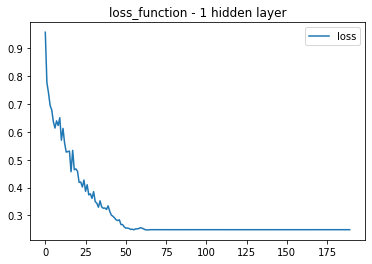

In [127]:
plt.plot(model_1.history["loss"][10:200])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [128]:
number_input_features = 84
hidden_nodes_layer1 = 252
hidden_nodes_layer2 = 126

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [130]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=20)

Train on 17373 samples, validate on 7446 samples
Epoch 1/20
17373/17373 [==============================] - 1s 33us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2492 - val_mse: 0.2492
Epoch 2/20
17373/17373 [==============================] - 0s 29us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2491 - val_mse: 0.2491
Epoch 3/20
17373/17373 [==============================] - 1s 29us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2491 - val_mse: 0.2491
Epoch 4/20
17373/17373 [==============================] - 1s 32us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2491 - val_mse: 0.2491
Epoch 5/20
17373/17373 [==============================] - 1s 30us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2491 - val_mse: 0.2491
Epoch 6/20
17373/17373 [==============================] - 0s 29us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2492 - val_mse: 0.2492
Epoch 7/20
17373/17373 [==============================] - 1s 31us/sample - loss: 0.2487 - mse: 0.2487 - val_loss: 0.2

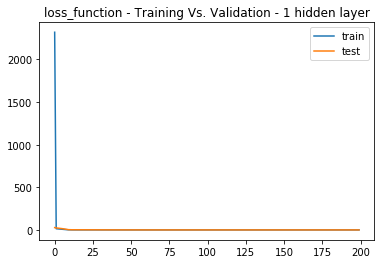

In [131]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

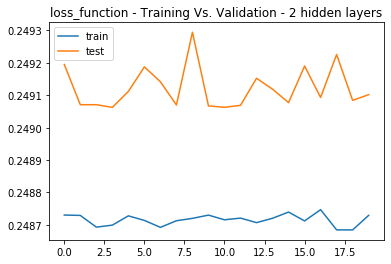

In [132]:
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [136]:
model_loss, model_accuracy = model_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

AttributeError: 'History' object has no attribute 'evaluate'